In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
dataset = pd.read_csv('/content/cell_data.csv')

# Display dataset info
dataset.info()
print(dataset.head())

# Replace '?' with NaN and drop missing values
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(inplace=True)

# Convert 'BareNuc' column to numeric
dataset['BareNuc'] = dataset['BareNuc'].astype(int)

# Rename 'Temp Class' column to 'Class' to avoid issues
dataset.rename(columns={'Temp Class': 'Class'}, inplace=True)

# Separate features and target variable
X = dataset.iloc[:, 1:-1].values  # Exclude ID column and Class column
y = dataset.iloc[:, -1].values  # Class column is the target

# Encode target labels (assuming binary classification: 0 & 1)
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize ANN
ann = tf.keras.models.Sequential()

# Input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Output layer (binary classification)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
ann.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
y_pred = (ann.predict(X_test) > 0.5)

# Evaluate model performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Predict a single sample (example input, should be replaced with real data)
sample_input = sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])
print("Single Sample Prediction:", ann.predict(sample_input) > 0.5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Temp Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6     

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6563 - loss: 0.7233
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6848 - loss: 0.6835 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6763 - loss: 0.6574 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6819 - loss: 0.6409
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6983 - loss: 0.5998  
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6981 - loss: 0.5748
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7005 - loss: 0.5516
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6774 - loss: 0.5355  
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6960 - loss: 0.5070
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.4685  
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6836 - loss: 0.4709  
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Confusion Matrix:
 [[126   4]
 [  2  73]]
Accuracy Score: 0.9707317073170731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Single Sample Prediction: [[False]]


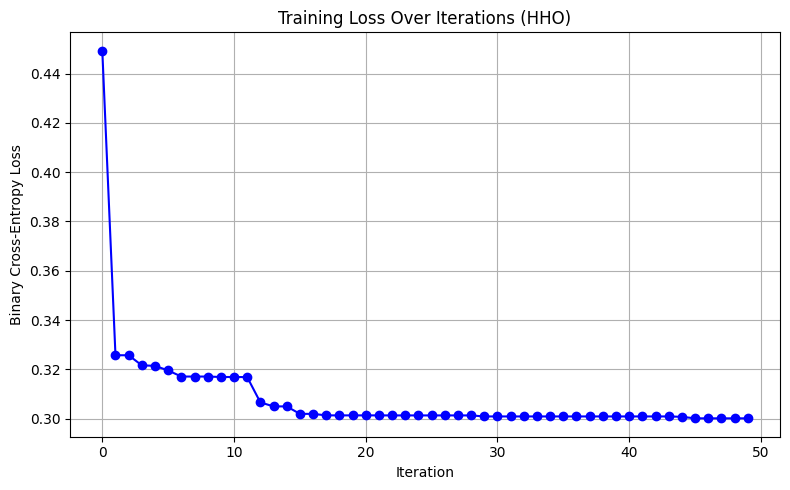

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
dataset = pd.read_csv('/content/cell_data.csv')
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(inplace=True)
dataset['BareNuc'] = dataset['BareNuc'].astype(int)
dataset.rename(columns={'Temp Class': 'Class'}, inplace=True)

# Separate features and target variable
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define ANN model
ann = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Function to get and set weights
def get_weights(model):
    weights = []
    for layer in model.layers:
        for w in layer.get_weights():
            weights.extend(w.flatten())
    return np.array(weights)

def set_weights(model, flat_weights):
    shapes = []
    for layer in model.layers:
        for w in layer.get_weights():
            shapes.append(w.shape)
    new_weights = []
    idx = 0
    for shape in shapes:
        size = np.prod(shape)
        new_weights.append(flat_weights[idx:idx+size].reshape(shape))
        idx += size
    model_idx = 0
    for layer in model.layers:
        num_weights = len(layer.get_weights())
        layer.set_weights(new_weights[model_idx:model_idx+num_weights])
        model_idx += num_weights

# Fitness function for HHO
def objective_function(weights):
    set_weights(ann, weights)
    y_pred = ann(X_train, training=True).numpy()
    loss = tf.keras.losses.binary_crossentropy(y_train.reshape(-1, 1), y_pred).numpy().mean()
    return loss

# HHO Algorithm with Loss Tracking
def HHO(objf, lb, ub, dim, SearchAgents_no=29, Max_iter=500):
    X = np.random.uniform(0, 1, (SearchAgents_no, dim)) * (ub - lb) + lb
    fitness = np.full(SearchAgents_no, np.inf)
    best_fitness = np.inf
    best_X = None
    loss_history = []

    for t in range(Max_iter):
        for i in range(SearchAgents_no):
            fitness[i] = objf(X[i])
            if fitness[i] < best_fitness:
                best_fitness = fitness[i]
                best_X = X[i].copy()

        loss_history.append(best_fitness)

        E1 = 2 * (1 - t / Max_iter)
        for i in range(SearchAgents_no):
            E0 = 2 * np.random.rand() - 1
            E = E1 * E0
            if abs(E) >= 1:
                rand_index = np.random.randint(SearchAgents_no)
                X_rand = X[rand_index]
                X[i] = X_rand - np.random.rand() * abs(X_rand - 2 * np.random.rand() * X[i])
            else:
                r = np.random.rand()
                X[i] = best_X - E * abs(r * best_X - X[i])
            X[i] = np.clip(X[i], lb, ub)

    return best_X, best_fitness, loss_history

# Run HHO
dim = len(get_weights(ann))
lb = -1 * np.ones(dim)
ub = 1 * np.ones(dim)
max_iter = 50  # Equivalent to "epochs"

best_weights, best_loss, loss_history = HHO(objective_function, lb, ub, dim, SearchAgents_no=10, Max_iter=max_iter)
set_weights(ann, best_weights)

# Evaluate the model
y_pred = ann.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Predict a single sample
sample_input = sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])
print("Single Sample Prediction:", ann.predict(sample_input) > 0.5)

# Plot training loss vs. iteration
plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker='o', linestyle='-', color='blue')
plt.title("Training Loss Over Iterations (HHO)")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8368 - loss: 0.4725
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9561 - loss: 0.2180
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9561 - loss: 0.2180
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9561 - loss: 0.2177
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9603 - loss: 0.2068
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9540 - loss: 0.2015
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9540 - loss: 0.1991
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9603 - loss: 0.1953
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9603 - loss: 0.1953
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9603 - loss: 0.1953
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9603 - loss: 0.1953
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

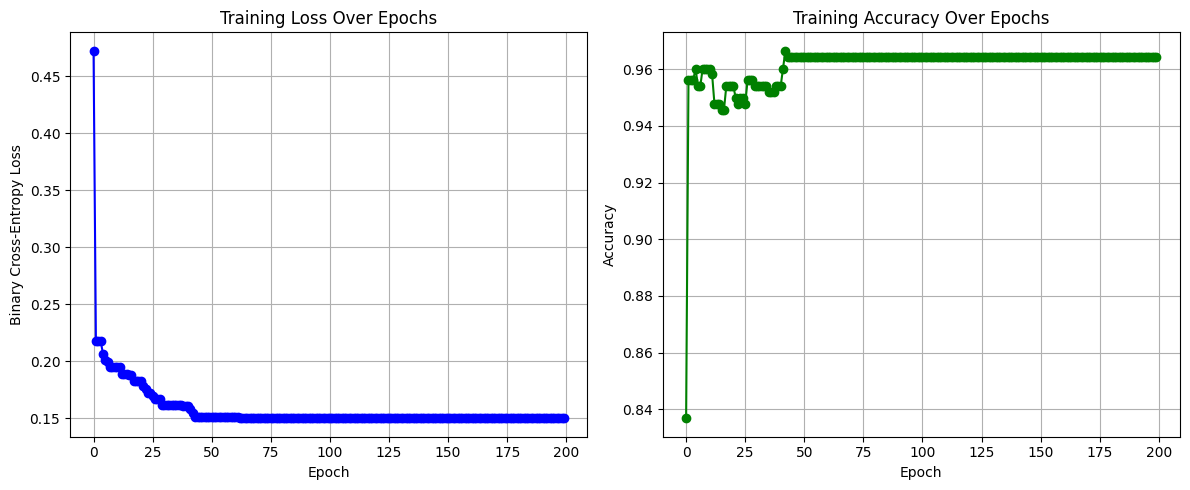

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import time


dataset = pd.read_csv('/content/cell_data.csv')
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(inplace=True)
dataset['BareNuc'] = dataset['BareNuc'].astype(int)
dataset.rename(columns={'Temp Class': 'Class'}, inplace=True)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = LabelEncoder().fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


ann = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


def get_weights(model):
    weights = []
    for layer in model.layers:
        for w in layer.get_weights():
            weights.extend(w.flatten())
    return np.array(weights)

def set_weights(model, flat_weights):
    shapes = []
    for layer in model.layers:
        for w in layer.get_weights():
            shapes.append(w.shape)
    new_weights = []
    idx = 0
    for shape in shapes:
        size = np.prod(shape)
        new_weights.append(flat_weights[idx:idx+size].reshape(shape))
        idx += size
    model_idx = 0
    for layer in model.layers:
        num_weights = len(layer.get_weights())
        layer.set_weights(new_weights[model_idx:model_idx+num_weights])
        model_idx += num_weights


def objective_function(weights):
    set_weights(ann, weights)
    y_pred = ann(X_train, training=False).numpy()
    loss = tf.keras.losses.binary_crossentropy(y_train.reshape(-1, 1), y_pred).numpy().mean()
    return loss


def HHO(objf, lb, ub, dim, SearchAgents_no=20, Max_iter=200):
    X = np.random.uniform(0, 1, (SearchAgents_no, dim)) * (ub - lb) + lb
    fitness = np.full(SearchAgents_no, np.inf)
    best_fitness = np.inf
    best_X = None


    loss_history = []
    acc_history = []

    for t in range(Max_iter):
        start_time = time.time()

        for i in range(SearchAgents_no):
            fitness[i] = objf(X[i])
            if fitness[i] < best_fitness:
                best_fitness = fitness[i]
                best_X = X[i].copy()

        set_weights(ann, best_X)
        y_pred_train = ann(X_train, training=False).numpy()
        epoch_loss = best_fitness
        epoch_acc = np.mean((y_pred_train > 0.5).astype(int).flatten() == y_train)

        loss_history.append(epoch_loss)
        acc_history.append(epoch_acc)

        elapsed = time.time() - start_time
        print(f"Epoch {t+1}/{Max_iter}")

        print(f"15/15 ━━━━━━━━━━━━━━━━━━━━ {elapsed:.0f}s {int(elapsed*1000)}ms/step - accuracy: {epoch_acc:.4f} - loss: {epoch_loss:.4f}")


        E1 = 2 * (1 - t / Max_iter)
        for i in range(SearchAgents_no):
            E0 = 2 * np.random.rand() - 1
            E = E1 * E0
            if abs(E) >= 1:
                rand_index = np.random.randint(SearchAgents_no)
                X_rand = X[rand_index]
                X[i] = X_rand - np.random.rand() * abs(X_rand - 2 * np.random.rand() * X[i])
            else:
                r = np.random.rand()
                X[i] = best_X - E * abs(r * best_X - X[i])
            X[i] = np.clip(X[i], lb, ub)
    return best_X, best_fitness, loss_history, acc_history



dim = len(get_weights(ann))
lb = -1 * np.ones(dim)
ub = 1 * np.ones(dim)
max_iter = 200
best_weights, best_loss, loss_history, acc_history = HHO(objective_function, lb, ub, dim, SearchAgents_no=10, Max_iter=max_iter)
set_weights(ann, best_weights)


y_pred = ann.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


sample_input = sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])
print("Single Sample Prediction:", ann.predict(sample_input) > 0.5)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, marker='o', linestyle='-', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(acc_history, marker='o', linestyle='-', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.grid(True)

plt.tight_layout()
plt.show()
